Quelques conseils:
- pour exécutez une cellule, cliquez sur le bouton *Exécuter* ci-dessus ou tapez **Shift+Enter**
- si l'exécution d'une cellule prend trop de temps, sélectionner dans le menu ci-dessus *Noyau/Interrompre*
- en cas de très gros plantage *Noyau/Redémarrer*
- **sauvegardez régulièrement vos réponses** en cliquant sur l'icone disquette ci-dessus à gauche, ou *Fichier/Créer une nouvelle sauvegarde*

Pour répondre aux questions, remplacer les lignes  
```python 
#LA REPONSE ICI
raise NotImplementedError()
``` 
par vos réponses, et remplissez les champs ci-dessous:

In [3]:
NOM = "Martinez"
PRENOM = "Maud"
GROUPE = "3"
DATE = "03/04/2019"

---

# TP 9 : Nombres aléatoires et méthode de Monte-Carlo

## Exercice 1: Générateur congruentiel linéaire

Écrivez un programme qui génère une suite de nombres pseudo-aléatoires à partir de l'expression:
$$x_{n+1}=(a x_n+c)\mod m$$
Représenter sur un graphique les 100 premières valeurs de la suite. Faites varier la valeur initiale de votre graine $x_0$. Pour obtenir un bon générateur vous pouvez utiliser les paramètres suivants:
	* a = 1664525
	* c = 1013904223
	* m = 4294967296
Qu'est-ce que vous obtenez en utilisant un autre jeu de paramètres? Vous pouvez essayer par exemple a=1, c=2, m=3.

In [4]:
from matplotlib import pyplot as pl

a= 1664525
c= 1013904223
m= 4294967296

X = range(0, 100)

def generateur(x, N) :
    res = []
    for i in X:
        x = (a*x + c) % m
        res.append(x)
    return res 

Y = generateur(5.3, 100)

fig = pl.figure
pl.plot(X, Y, marker = 'o', linestyle = 'None')
pl.show()

    

<Figure size 640x480 with 1 Axes>

## Exercice 2: Poker

Écrivez un programme qui mélange un jeu de 52 cartes (indiquées par les numéros de 1 à 52). Vous distribuez ensuite cinq cartes à chacun des quatre joueurs. Facultatif: les cartes sont données en faisant le tour entre les joueurs. Pensez à comment parcourir votre liste pour extraire les cartes données à chaque joueurs: point de départ dans la liste, nombre de positions dans la liste à sauter avant de recevoir une nouvelle carte.

In [5]:
import numpy as np

jeu = np.arange(1, 53, 1)
jeu_mel= np.random.permutation(jeu)

print(jeu_mel)

J_1 = jeu_mel[::4][:5]
J_2 = jeu_mel[1::4][:5]
J_3 = jeu_mel[2::4][:5]
J_4 = jeu_mel[3::4][:5]

print(J_1)
print(J_2)
print(J_3)
print(J_4)


[10 44 30  9 38 17 52 13 49 46 20 21 51  5 36 29 28 22 31  4 19 34 45 37
 25 27  1 18 32 26 40 24 23  7 48 14 12  2 35  8 11 50  6 42 39 15 47  3
 16 43 41 33]
[10 38 49 51 28]
[44 17 46  5 22]
[30 52 20 36 31]
[ 9 13 21 29  4]


## Exercice 3: Marche aléatoire:

Dans cet exercice il s'agit de simuler la trajectoire d'une particule qui suit une marche aléatoire dans un espace bidimensionnel.     

* Au début la particule se trouve dans la position $\vec{r}=(0,0)$ du plan.
* Un pas correspond à un déplacement de la particule d'un vecteur $\Delta \vec{r}$ de longueur 1 qui forme un angle $\theta$ par rapport à l'axe $x$ du plan. La direction $\theta$ est choisi aléatoirement à chaque itération.
* La nouvelle position $\vec{r}+\Delta \vec{r}$ est le point de départ pour l'itération suivante.
Dans cette exercice vous devez construire les listes des coordonnées x et y des différentes points de la trajectoire de la particule. La trajectoire sera ensuite représentée dans un graphique par un trait continu. Vous pouvez choisir de représenter une trajectoire de 1000 pas.

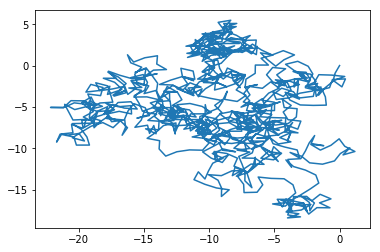

In [6]:
traj= [[0,0]]

for i in range(1001) :
    theta =np.random.uniform(0, 2*np.pi)
    traj.append([traj[-1][0] + np.cos(theta),traj[-1][1] + np.sin(theta)])
    
X = [x[0] for x in traj]
Y = [y[1] for y in traj]

fig = pl.figure()
pl.plot(X,Y)
pl.show()



Vous considerez maintenant l'évolution temporelle d'un ensemble de 300 particules. Au début toutes les particules se trouvent dans la position $\vec{r}=(0,0)$ du plan. Ensuite elle se déplacent en suivant une marche aléatoire. Tracer sur un même graphe la position finale de toutes les particules après 10, 100, 1000 et 10000 pas. Quel phénomène peut-on simuler grace à cette méthode?

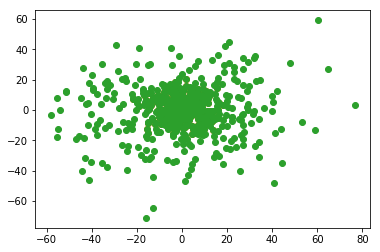

In [8]:
arrive= []

fig = pl.figure()
for n in [10,100,1000] :
    for p in range(301) :
        point= [0, 0]
        for i in range(n +1) :
            theta =np.random.uniform(0, 2*np.pi)
            point=([point[0] + np.cos(theta),point[1] + np.sin(theta)])
        
        arrive.append(point)
    
    X = [x[0] for x in arrive]
    Y = [y[1] for y in arrive]


    pl.plot(X,Y, marker = 'o', linestyle ='None')
pl.show()


## Exercice 4: Estimation de $\pi$ par la méthode de Monte-Carlo


Dans ce problème vous devez évaluer numériquement la valeur de $\pi$. Pour ceci vous devez appliquer la méthode d'intégration Monte-Carlo à un disque de rayon 1, qui aura donc une surface égale à $\pi$, inscrit dans un carré de côtés 2 centré sur (0,0). Une illustration graphique vous est donnée dans la figure suivante pour un petit nombre de points:
<img align="center" src="plots/figure_1.png" width="30%" />

Les étapes suivantes suivent la logique de construction de votre code :
	
* Générer la position d'un point aléatoire à l'intérieur du carré (vecteur à deux dimensions).
* Répéter cette opération afin d’obtenir N points aléatoires. Pour chaque point vous devez évaluer s'il est contenu à l'intérieur du cercle unitaire et mettre à jour un compteur correspondant.
* A l'aide de la fonction `plt.scatter()`, visualiser les deux séries de points, rouge pour les points à l'intérieur, bleu pour ceux à l'extérieur.
* Donner votre évaluation de $\pi$.

3.13624


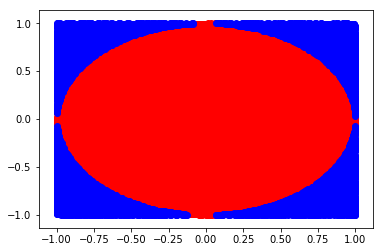

In [40]:
def pt_aleat():
    return [np.random.uniform(-1,1),np.random.uniform(-1,1)]

N= 100000
list_cer =[]
list_pcer =[]
c_cercle =0

for n in range (N + 1):
    P =pt_aleat()
    
    if P[0]**2+P[1]**2 <=1 :
        c_cercle += 1
        list_cer.append(P)
    else :
        list_pcer.append(P)
           
p=c_cercle*4/N
print(p)

X_cer= [x[0] for x in list_cer]
Y_cer= [y[1] for y in list_cer]

X_pcer= [x[0] for x in list_pcer]
Y_pcer= [y[1] for y in list_pcer]

fig = pl.figure
pl.scatter(X_cer, Y_cer, color = 'red')
pl.scatter(X_pcer, Y_pcer, color = 'blue')
pl.show()